### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



#### Load the health insurance dataset and check the first five observations

In [546]:
data = pd.read_csv('health_insurance.csv')
data.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [548]:
data.shape

(1300, 8)

In [549]:
(data.isna().sum()/data.shape[0]) * 100

age             0.0
gender          0.0
bmi             0.0
bp              0.0
children        0.0
region          0.0
smoker          0.0
medical_cost    0.0
dtype: float64

In [550]:
# No- Null Values in the data

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [551]:
import warnings
warnings.filterwarnings('ignore')

In [552]:
data.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [554]:
# for Univarient Analysis : we are going to plot Distplot, Boxplot

In [555]:
num_cols = data.select_dtypes(include=['int64','float64'])
cat_cols = data.select_dtypes(include='object')

In [556]:
num_cols

,age,bmi,bp,children,medical_cost
0,23,31.900,157,0,16884.92400
1,20,36.770,160,1,1725.55230
2,33,35.000,145,3,4449.46200
3,37,23.705,153,0,21984.47061
4,36,27.880,156,0,3866.85520
...,...,...,...,...,...
1295,54,30.970,143,3,10600.54830
1296,22,34.920,156,0,2205.98080
1297,21,34.850,145,0,1629.83350
1298,22,24.800,150,0,2007.94500


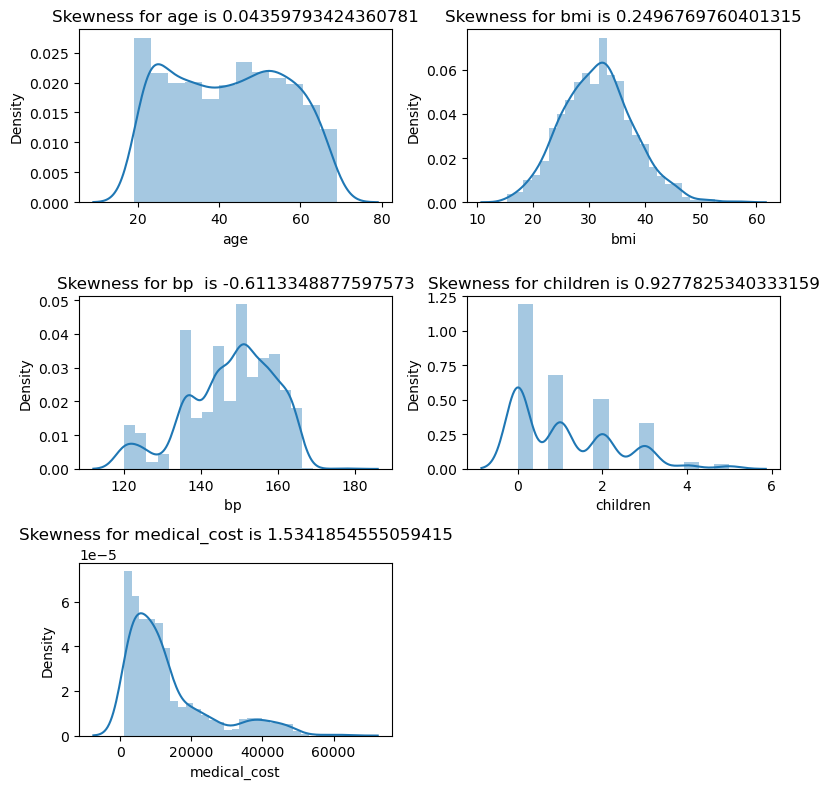

In [557]:
# Univariant for numerical cols

# Distplot
t = 1
plt.figure(figsize=(8,8))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(num_cols[i])
    plt.title(f'Skewness for {i} is {num_cols[i].skew()}')
    t += 1
    plt.tight_layout()
plt.show()


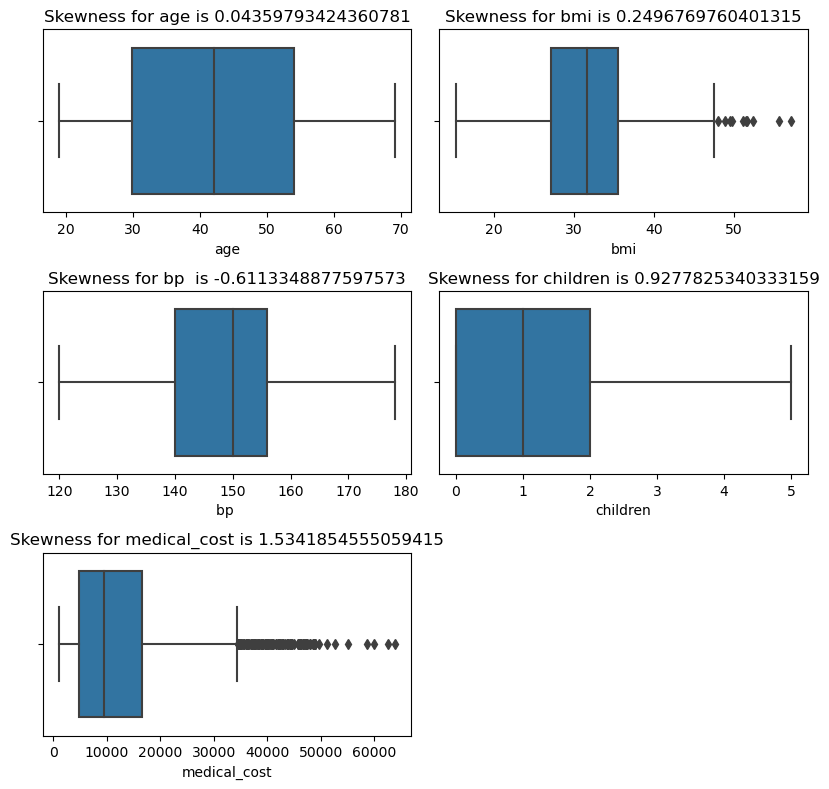

In [558]:
# Barplots
t = 1
plt.figure(figsize=(8,8))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x = num_cols[i])
    plt.title(f'Skewness for {i} is {num_cols[i].skew()}')
    t += 1
    plt.tight_layout()
plt.show()


### Infrence the Num_Cols:
BMI, Medical_cost features have the most outliers and need to treat 

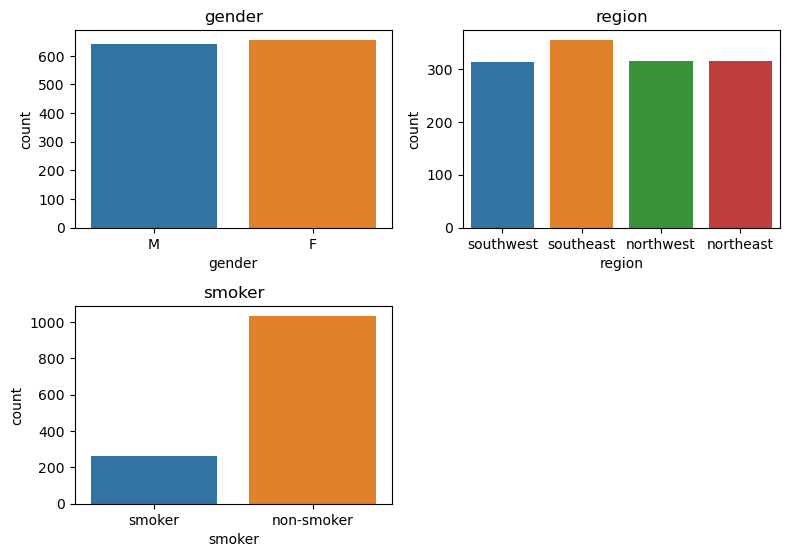

In [559]:
#Univarient for Categorical cols
# Bar plot
t = 1
plt.figure(figsize=(8,8))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot( x = cat_cols[i])
    plt.title(i)
#     plt.title(f'Skewness for {i} is {num_cols[i].skew()}')
    t += 1
    plt.tight_layout()
plt.show()


### Infrence :

-> In smoker barplot the non-smoker have the higher count than the smokers.

-> in region southeast have the highest count 

-> But in Gender countplot, It show almost equality.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

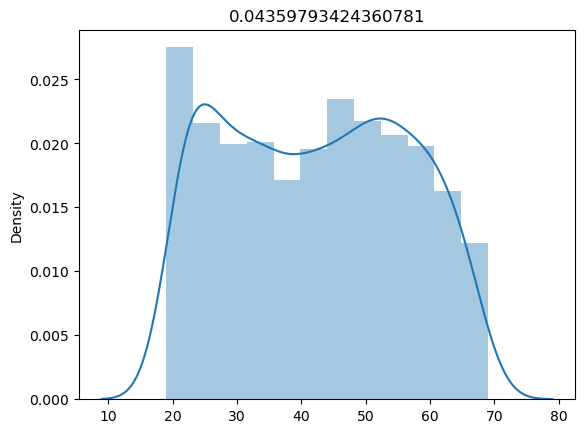

In [560]:
sns.distplot(x = num_cols['age'])
plt.title(num_cols['age'].skew())
plt.show()

### Infrence : 

Yes the age is skewed and show the <b>Bimodal Distribution</b> with Skewness of 0.0435 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [561]:
less_than_25k_count = data[data['medical_cost'] < 25000].shape[0]
total_individuals = data.shape[0]
probability_less_than_25k = less_than_25k_count / total_individuals

print(f"Probability that individuals have charged less than 25k for medical treatment: {probability_less_than_25k:.2f}")



Probability that individuals have charged less than 25k for medical treatment: 0.85


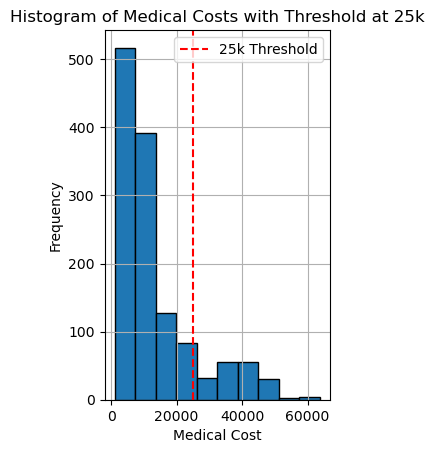

In [562]:
plt.subplot(1, 2, 1)
plt.hist(data['medical_cost'], bins=10, edgecolor='black')
plt.axvline(x=25000, color='r', linestyle='--', label='25k Threshold')
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Medical Costs with Threshold at 25k')
plt.legend()
plt.grid(True)

In [563]:
from scipy.stats import norm

In [564]:
mean_cost = data['medical_cost'].mean()
std_cost = data['medical_cost'].std()

# Calculate the probability P(X <= 25000) using the CDF
x_value = 25000
probability = norm.cdf(x_value, loc=mean_cost, scale=std_cost)

print(f"P(X <= {x_value}) = {probability:.4f}")

mean_cost,std_cost

P(X <= 25000) = 0.8352


(13243.21469066077, 12060.371167178371)

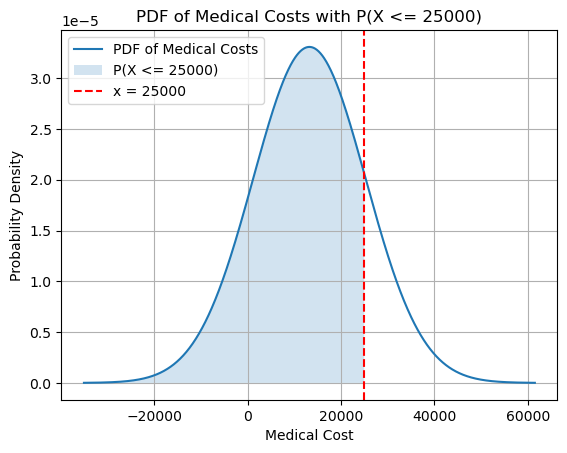

In [565]:
x = np.linspace(mean_cost - 4*std_cost, mean_cost + 4*std_cost, 1000)
pdf = norm.pdf(x, loc=mean_cost, scale=std_cost)

plt.plot(x, pdf, label='PDF of Medical Costs')
plt.fill_between(x, pdf, where=(x <= x_value), alpha=0.2, label=f'P(X <= {x_value:.0f})')
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value}')
plt.xlabel('Medical Cost')
plt.ylabel('Probability Density')
plt.title('PDF of Medical Costs with P(X <= 25000)')
plt.legend()
plt.grid(True)
plt.show()
# print(pdf)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

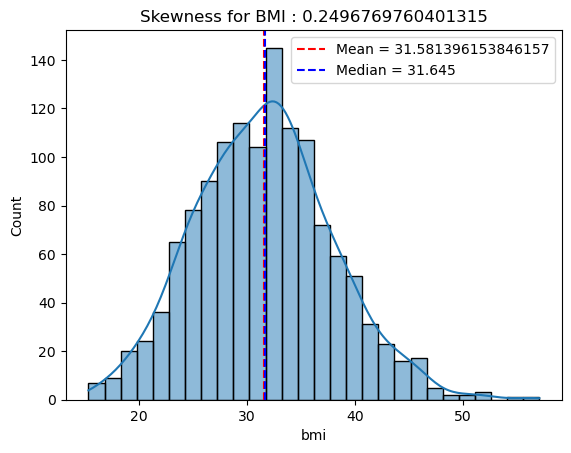

In [566]:
bmi_median = data['bmi'].median()
bmi_mean = data['bmi'].mean()
bmi_skewness = data['bmi'].skew()

sns.histplot(data['bmi'], kde=True)

plt.title(f"Skewness for BMI : {bmi_skewness}")
plt.axvline(x=bmi_mean, color='r', linestyle='--', label=f'Mean = {bmi_mean}')
plt.axvline(x=bmi_median, color='b', linestyle='--', label=f'Median = {bmi_median}')
plt.legend()
plt.show()

# Skewness is close to zero, can consider it as Normal Distt (but +ve skewness is Right skewed N-D)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: title={'center': 'With Self'}>

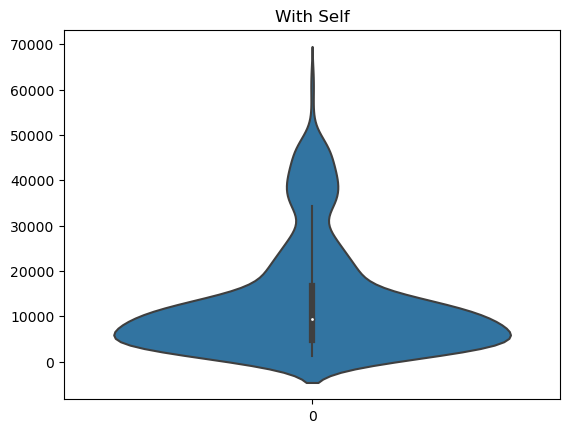

In [567]:
plt.title('With Self')
sns.violinplot(num_cols['medical_cost'])


In [568]:
# Medical cost ranges mostly betweenn 0-20000.
# There are few bills between 20000 to 50000 and 
# very rare bills are above 50000 which are basically outliers.

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

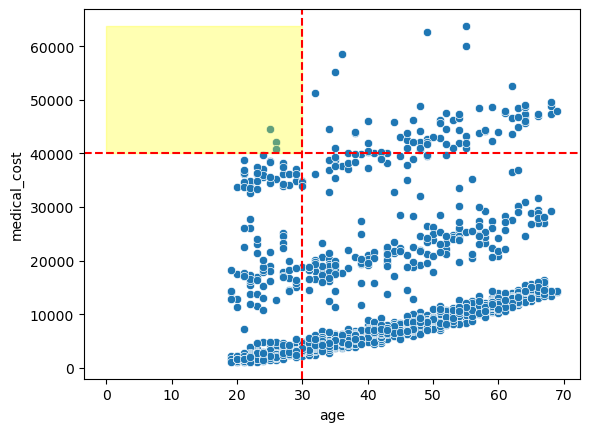

In [569]:
# t = 1 
# plt.figure(figsize=(10,7))
# for i in cat_cols:
#     plt.subplot(2,2,t)
#     plt.title(f'With {i}')
#     sns.violinplot(y = num_cols['medical_cost'], x = cat_cols[i] )
#     t += 1
#     plt.tight_layout()

# plt.show()

sns.scatterplot(y = num_cols['medical_cost'], x = num_cols['age'] )
plt.axvline(x=30, color='r', linestyle='--')
plt.axhline(y=40000, color='r', linestyle='--')
plt.fill_betweenx(y=[40000, data['medical_cost'].max()], x1=0, x2=30, color='yellow', alpha=0.3)
plt.show()

### Infrence : 

There are 3 Individual with the age less than 30 years and medical_cost greater tha 40K.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [570]:
def detect_outliers(df, columns_name):
    Q1 = df[columns_name].quantile(0.25)
    Q3 = df[columns_name].quantile(0.75)
    iqr = Q3 - Q1
    
    lower_bound = Q1 - (iqr * 1.5)
    upper_bound = Q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound
    

In [571]:
y_min, y_max = detect_outliers(data, 'medical_cost')
x_min, x_max = detect_outliers(data, 'bmi')


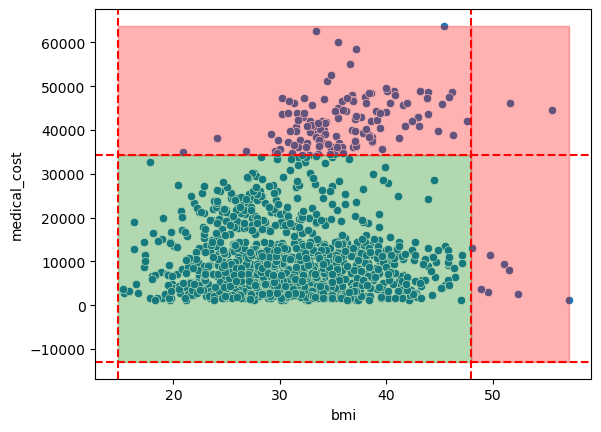

In [572]:
sns.scatterplot(x=data['bmi'], y = data['medical_cost'])
plt.axvline(x=x_max, color='r', linestyle='--')
plt.axvline(x=x_min, color='r', linestyle='--')
plt.axhline(y=y_max, color='r', linestyle='--')
plt.axhline(y=y_min, color='r', linestyle='--')
plt.fill_betweenx(y=[y_min, y_max], x1=x_min, x2=x_max, color='green', alpha=0.3)
plt.fill_betweenx(y=[y_min, data['medical_cost'].max()], x1=x_max, x2=data['bmi'].max(), color='red', alpha=0.3)
plt.fill_betweenx(y=[y_max, data['medical_cost'].max()], x1=x_min, x2=x_max, color='red', alpha=0.3)
plt.show()

### Scatter plot itself doesn't represent the outline but using IQR method on both medical_cost and bmi we can find the 
1. All the Green filled values in the chart represents the non-outlier.
2. All the Red filled values are the Outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [573]:
bmi_stats = data.groupby('gender')['bmi'].agg(['mean', 'std']).reset_index()

# Calculate percentage variation
bmi_stats['percentage_variation'] = (bmi_stats['std'] / bmi_stats['mean']) * 100

# Display the results
print(bmi_stats)

  gender       mean       std  percentage_variation
0      F  31.825989  6.403398             20.120029
1      M  31.331477  6.303368             20.118324


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='gender'>

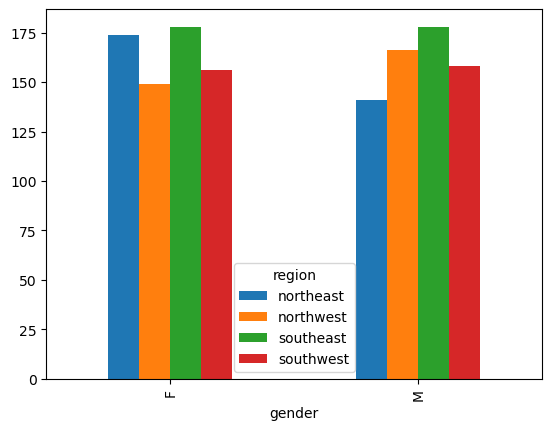

In [574]:
# Category vs Category columns

pd.crosstab(index=data['gender'], columns=data['region'], values=data['gender'], aggfunc='count').plot(kind = 'bar')

In [575]:
male_df = data[data['gender'] == 'M']

# Group by region and count the number of males in each region
region_male_count = male_df.groupby('region')['gender'].count()
region_male_count

region
northeast    141
northwest    166
southeast    178
southwest    158
Name: gender, dtype: int64

### Infrence :

Southeast has the highest male population 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

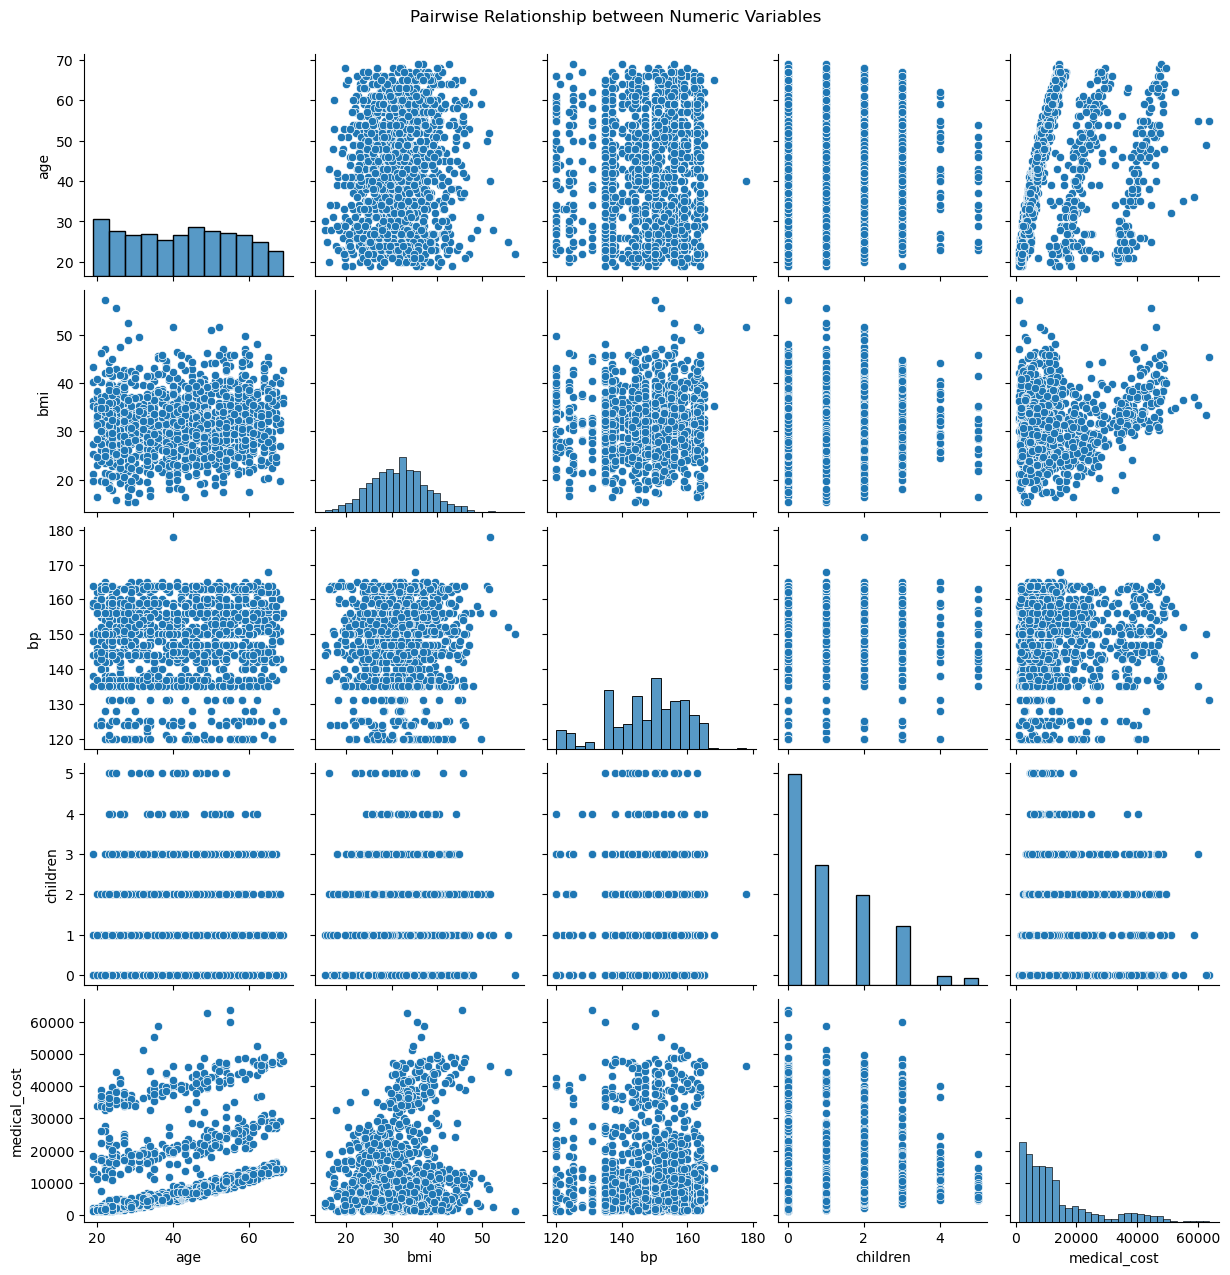

In [576]:
sns.pairplot(num_cols)
plt.suptitle('Pairwise Relationship between Numeric Variables', y=1.02)
plt.show()

<Axes: >

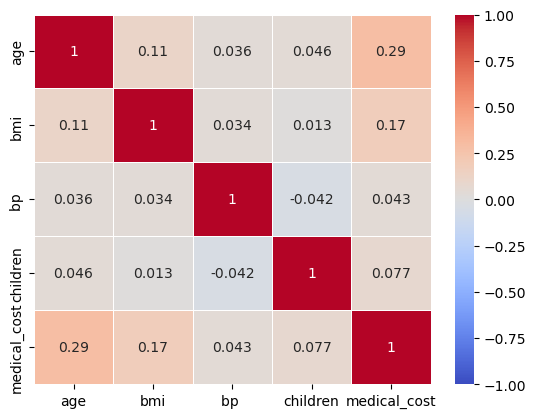

In [577]:
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

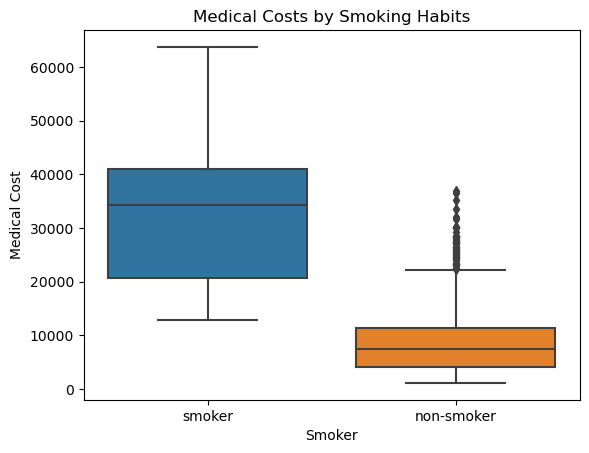

In [578]:
sns.boxplot(x='smoker', y='medical_cost', data=data)
plt.title('Medical Costs by Smoking Habits')
plt.xlabel('Smoker')
plt.ylabel('Medical Cost')
plt.show()

# Infrence : The smokers Medical Cost is higher than the Non-Smokers 

In [579]:
from scipy.stats import ttest_ind

# Separate the medical costs for smokers and non-smokers
smokers_cost = data[data['smoker'] == 'smoker']['medical_cost']
non_smokers_cost = data[data['smoker'] == 'non-smoker']['medical_cost']

# Perform a t-test to check if the difference is statistically significant
t_stat, p_value = ttest_ind(smokers_cost, non_smokers_cost, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in medical costs between smokers and non-smokers is statistically significant.")
else:
    print("The difference in medical costs between smokers and non-smokers is not statistically significant.")


T-statistic: 31.979910802583767
P-value: 1.001858220097733e-98
The difference in medical costs between smokers and non-smokers is statistically significant.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

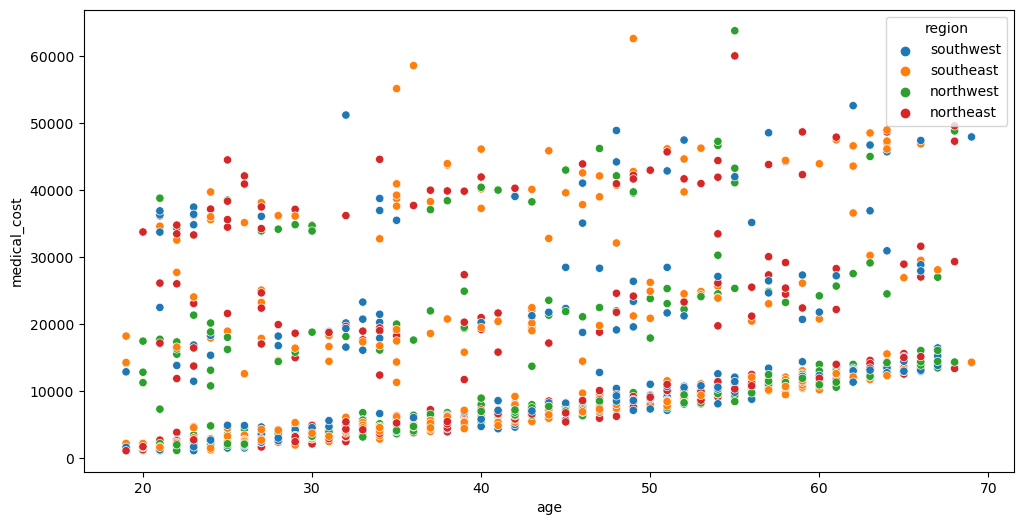

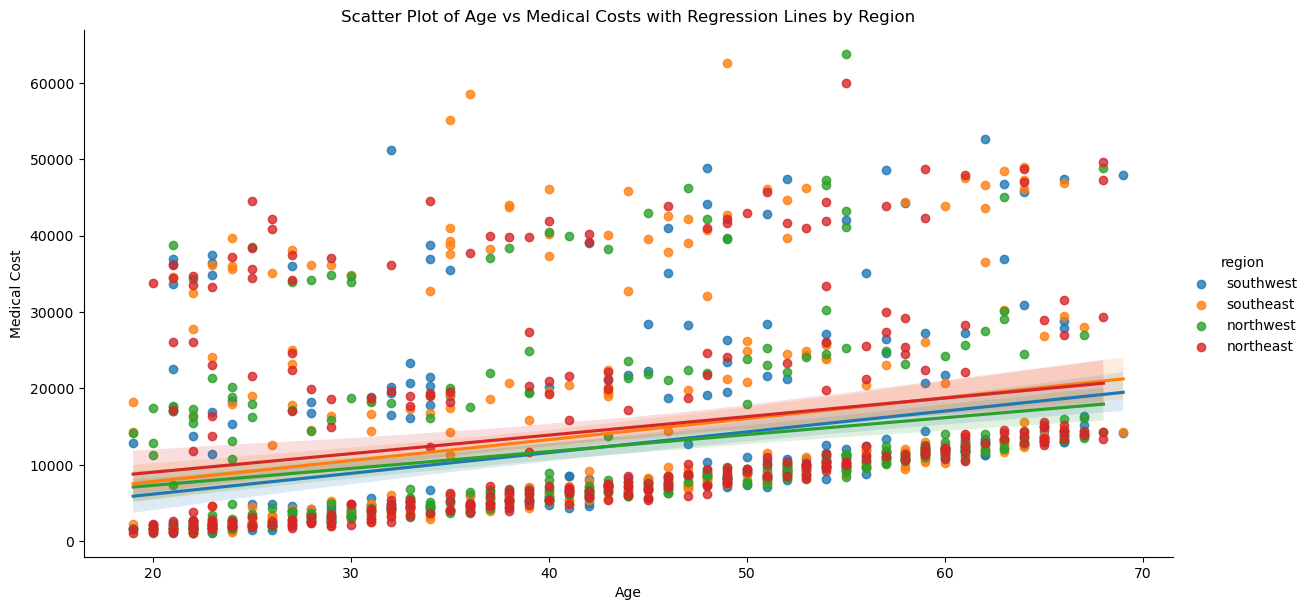

In [580]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='medical_cost', hue='region', data=data)
sns.lmplot(x='age', y='medical_cost', hue='region', data=data, aspect=2, height=6)
plt.title('Scatter Plot of Age vs Medical Costs with Regression Lines by Region')
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.show()

<a id="outlier"> </a>
## 3. Outlier Treatment

In [581]:
data.shape

(1300, 8)

In [582]:
data['medical_cost'].describe()

count     1300.000000
mean     13243.214691
std      12060.371167
min       1121.873900
25%       4760.155950
50%       9388.753650
75%      16579.959053
max      63770.428010
Name: medical_cost, dtype: float64

In [583]:
for i in data.select_dtypes(include=['int64','float64']):
    lb, ub = detect_outliers(data, i)
    print(i, lb, ub)
#     data[(data[i] > lb) & (data[i] < ub)]

age -6.625 90.375
bmi 14.785625000000005 47.91062499999999
bp  116.0 180.0
children -3.0 5.0
medical_cost -12969.548703750002 34309.66370625001


In [584]:
data = data[(data['age'] > -6.625) & (data['age'] < 90.375)]
data.shape

(1300, 8)

In [585]:
data = data[(data['bmi'] > 14.785625000000005) & (data['bmi'] < 47.91062499999999)]
data.shape

(1290, 8)

In [586]:
data = data[(data['bp '] > 116.0) & (data['bp '] < 180.0)]
data.shape

(1290, 8)

In [587]:
data = data[(data['children'] > -3.0) & (data['children'] < 5.0)]
data.shape

(1272, 8)

In [588]:
data = data[(data['medical_cost'] > -12969.548703750002) & (data['medical_cost'] < 34309.66370625001)]
data.shape

(1139, 8)

<a id="cat"> </a>
## 4. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1139 non-null   int64  
 1   gender        1139 non-null   object 
 2   bmi           1139 non-null   float64
 3   bp            1139 non-null   int64  
 4   children      1139 non-null   int64  
 5   region        1139 non-null   object 
 6   smoker        1139 non-null   object 
 7   medical_cost  1139 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 80.1+ KB


In [590]:
data['region'].value_counts()

region
southeast    305
northwest    285
southwest    278
northeast    271
Name: count, dtype: int64

In [591]:
data

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [592]:
data = pd.get_dummies(data=data, columns=['region'], drop_first=True)
data

,age,gender,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest
0,23,M,31.900,157,0,smoker,16884.92400,False,False,True
1,20,F,36.770,160,1,non-smoker,1725.55230,False,True,False
2,33,F,35.000,145,3,non-smoker,4449.46200,False,True,False
3,37,F,23.705,153,0,non-smoker,21984.47061,True,False,False
4,36,F,27.880,156,0,non-smoker,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,non-smoker,10600.54830,False,False,True
1296,22,M,34.920,156,0,non-smoker,2205.98080,False,False,False
1297,21,M,34.850,145,0,non-smoker,1629.83350,False,True,False
1298,22,M,24.800,150,0,non-smoker,2007.94500,True,False,False


In [593]:
data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)

In [594]:
data

,age,gender,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest
0,23,M,31.900,157,0,smoker,16884.92400,0,0,1
1,20,F,36.770,160,1,non-smoker,1725.55230,0,1,0
2,33,F,35.000,145,3,non-smoker,4449.46200,0,1,0
3,37,F,23.705,153,0,non-smoker,21984.47061,1,0,0
4,36,F,27.880,156,0,non-smoker,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,non-smoker,10600.54830,0,0,1
1296,22,M,34.920,156,0,non-smoker,2205.98080,0,0,0
1297,21,M,34.850,145,0,non-smoker,1629.83350,0,1,0
1298,22,M,24.800,150,0,non-smoker,2007.94500,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [595]:
from sklearn.preprocessing import LabelEncoder

In [596]:
le = LabelEncoder()
data['smoker_label'] = le.fit_transform(data['smoker'])
data

,age,gender,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest,smoker_label
0,23,M,31.900,157,0,smoker,16884.92400,0,0,1,1
1,20,F,36.770,160,1,non-smoker,1725.55230,0,1,0,0
2,33,F,35.000,145,3,non-smoker,4449.46200,0,1,0,0
3,37,F,23.705,153,0,non-smoker,21984.47061,1,0,0,0
4,36,F,27.880,156,0,non-smoker,3866.85520,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,non-smoker,10600.54830,0,0,1,0
1296,22,M,34.920,156,0,non-smoker,2205.98080,0,0,0,0
1297,21,M,34.850,145,0,non-smoker,1629.83350,0,1,0,0
1298,22,M,24.800,150,0,non-smoker,2007.94500,1,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [597]:
gender_counts = data['gender'].value_counts()
gender_counts

gender
M    581
F    558
Name: count, dtype: int64

In [598]:
data['gender_frequency'] = data['gender'].map(gender_counts)
data

,age,gender,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest,smoker_label,gender_frequency
0,23,M,31.900,157,0,smoker,16884.92400,0,0,1,1,581
1,20,F,36.770,160,1,non-smoker,1725.55230,0,1,0,0,558
2,33,F,35.000,145,3,non-smoker,4449.46200,0,1,0,0,558
3,37,F,23.705,153,0,non-smoker,21984.47061,1,0,0,0,558
4,36,F,27.880,156,0,non-smoker,3866.85520,1,0,0,0,558
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,non-smoker,10600.54830,0,0,1,0,558
1296,22,M,34.920,156,0,non-smoker,2205.98080,0,0,0,0,581
1297,21,M,34.850,145,0,non-smoker,1629.83350,0,1,0,0,581
1298,22,M,24.800,150,0,non-smoker,2007.94500,1,0,0,0,581


In [599]:
data.drop(columns=['gender'], inplace=True)
data

,age,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest,smoker_label,gender_frequency
0,23,31.900,157,0,smoker,16884.92400,0,0,1,1,581
1,20,36.770,160,1,non-smoker,1725.55230,0,1,0,0,558
2,33,35.000,145,3,non-smoker,4449.46200,0,1,0,0,558
3,37,23.705,153,0,non-smoker,21984.47061,1,0,0,0,558
4,36,27.880,156,0,non-smoker,3866.85520,1,0,0,0,558
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,30.970,143,3,non-smoker,10600.54830,0,0,1,0,558
1296,22,34.920,156,0,non-smoker,2205.98080,0,0,0,0,581
1297,21,34.850,145,0,non-smoker,1629.83350,0,1,0,0,581
1298,22,24.800,150,0,non-smoker,2007.94500,1,0,0,0,581


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [600]:
data['smoker_binary'] = data['smoker'].map({'smoker': 1, 'non-smoker': 0})
data

,age,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest,smoker_label,gender_frequency,smoker_binary
0,23,31.900,157,0,smoker,16884.92400,0,0,1,1,581,1
1,20,36.770,160,1,non-smoker,1725.55230,0,1,0,0,558,0
2,33,35.000,145,3,non-smoker,4449.46200,0,1,0,0,558,0
3,37,23.705,153,0,non-smoker,21984.47061,1,0,0,0,558,0
4,36,27.880,156,0,non-smoker,3866.85520,1,0,0,0,558,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,30.970,143,3,non-smoker,10600.54830,0,0,1,0,558,0
1296,22,34.920,156,0,non-smoker,2205.98080,0,0,0,0,581,0
1297,21,34.850,145,0,non-smoker,1629.83350,0,1,0,0,581,0
1298,22,24.800,150,0,non-smoker,2007.94500,1,0,0,0,581,0


<a id="norm"> </a>
## 5. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [603]:
data['bmi'].describe()

count    1139.000000
mean       30.933306
std         6.064428
min        15.290000
25%        26.652500
50%        30.775000
75%        34.900000
max        47.090000
Name: bmi, dtype: float64

In [605]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data['bmi'] = sc.fit_transform(data[['bmi']])


In [611]:
np.mean(data['bmi'])
# almost zero//////

-4.460386796035747e-16

In [614]:
data['bmi'].var()

#almost 1

1.000878734622145

<Axes: xlabel='bmi', ylabel='Density'>

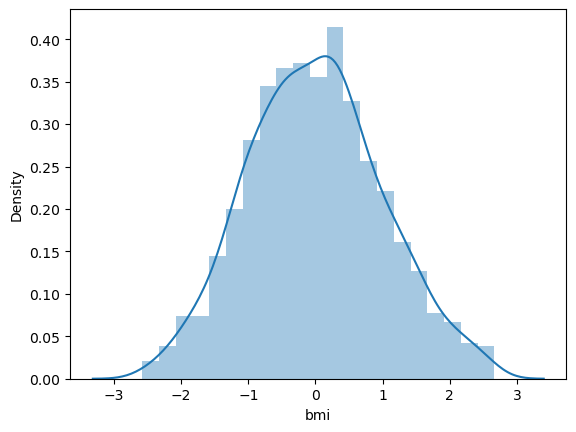

In [615]:
sns.distplot(data['bmi'])

# Normal Distt -> Gussian Distt

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [616]:
data['age']

0       23
1       20
2       33
3       37
4       36
        ..
1295    54
1296    22
1297    21
1298    22
1299    63
Name: age, Length: 1139, dtype: int64

In [617]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data['age'] = sc.fit_transform(data[['age']])

In [620]:
data

,age,bmi,bp,children,smoker,medical_cost,region_northwest,region_southeast,region_southwest,smoker_label,gender_frequency,smoker_binary
0,0.08,0.159474,157,0,smoker,16884.92400,0,0,1,1,581,1
1,0.02,0.962870,160,1,non-smoker,1725.55230,0,1,0,0,558,0
2,0.28,0.670876,145,3,non-smoker,4449.46200,0,1,0,0,558,0
3,0.36,-1.192442,153,0,non-smoker,21984.47061,1,0,0,0,558,0
4,0.34,-0.503699,156,0,non-smoker,3866.85520,1,0,0,0,558,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.70,0.006053,143,3,non-smoker,10600.54830,0,0,1,0,558,0
1296,0.06,0.657679,156,0,non-smoker,2205.98080,0,0,0,0,581,0
1297,0.04,0.646131,145,0,non-smoker,1629.83350,0,1,0,0,581,0
1298,0.06,-1.011802,150,0,non-smoker,2007.94500,1,0,0,0,581,0


<a id="trans"> </a>
## 6. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [622]:
data['medical_cost'].skew()

1.147302793395304

<Axes: xlabel='medical_cost', ylabel='Density'>

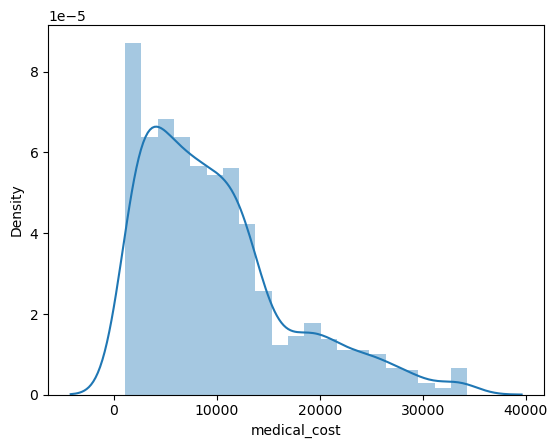

In [623]:
sns.distplot(data['medical_cost'])

In [626]:
(data['medical_cost']<=0).sum()

0

In [624]:
# we gonna use log Transformation because it's right skewed data

new_skew = np.log(data['medical_cost'] + 1) # adding 1 to avoid log(0)
new_skew.skew()

-0.3406515586367073

<Axes: xlabel='medical_cost', ylabel='Density'>

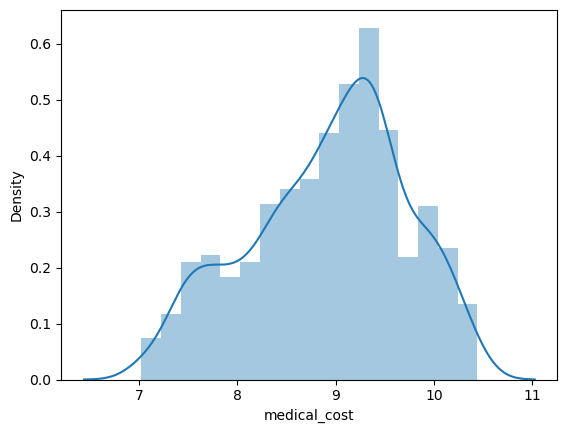

In [625]:
sns.distplot(new_skew)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [627]:
original_medical_cost = np.exp(new_skew) - 1
original_medical_cost

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1295    10600.54830
1296     2205.98080
1297     1629.83350
1298     2007.94500
1299    29141.36030
Name: medical_cost, Length: 1139, dtype: float64

In [633]:
(data['medical_cost'] - original_medical_cost).sum()

# almost zero

8.617462299298495e-11

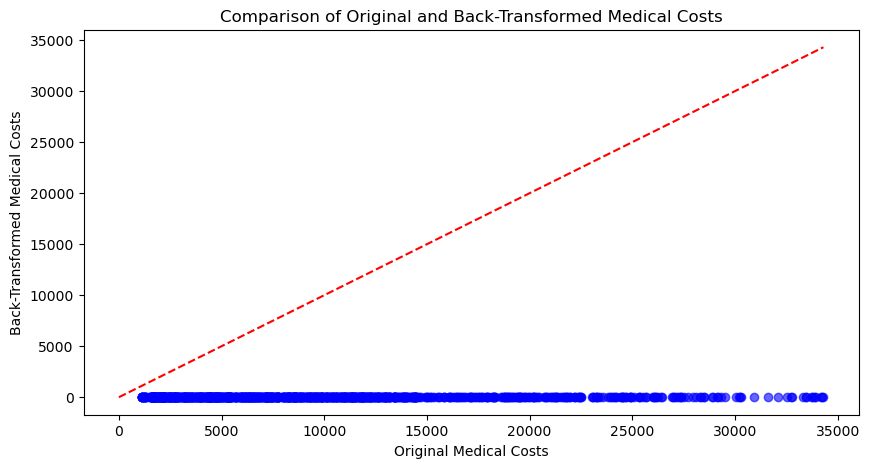

In [634]:
plt.figure(figsize=(10, 5))
plt.scatter(data['medical_cost'], new_skew, alpha=0.6, color='blue')
plt.title('Comparison of Original and Back-Transformed Medical Costs')
plt.xlabel('Original Medical Costs')
plt.ylabel('Back-Transformed Medical Costs')
plt.plot([0, max(data['medical_cost'])], [0, max(data['medical_cost'])], 'r--') # Line for perfect agreement
plt.show()